# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [34]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

RANDOM_STATE = 321 

Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [2]:
# Data Dimmension
data.shape

(178, 14)

In [4]:
# Missing Values
data.isna().sum().sum()

0

Minimum:11.03
Mean:13.00
Median:13.05
Mode:12.37
Maximum:14.83

Minimum:0.74
Mean:2.34
Median:1.87
Mode:1.73
Maximum:5.80

Minimum:1.36
Mean:2.37
Median:2.36
Mode:2.28
Maximum:3.23

Minimum:10.60
Mean:19.49
Median:19.50
Mode:20.00
Maximum:30.00

Minimum:70.00
Mean:99.74
Median:98.00
Mode:88.00
Maximum:162.00

Minimum:0.98
Mean:2.30
Median:2.35
Mode:2.20
Maximum:3.88

Minimum:0.34
Mean:2.03
Median:2.13
Mode:2.65
Maximum:5.08

Minimum:0.13
Mean:0.36
Median:0.34
Mode:0.26
Maximum:0.66

Minimum:0.41
Mean:1.59
Median:1.56
Mode:1.35
Maximum:3.58

Minimum:1.28
Mean:5.06
Median:4.69
Mode:2.60
Maximum:13.00

Minimum:0.48
Mean:0.96
Median:0.96
Mode:1.04
Maximum:1.71

Minimum:1.27
Mean:2.61
Median:2.78
Mode:2.87
Maximum:4.00

Minimum:278.00
Mean:746.89
Median:673.50
Mode:520.00
Maximum:1680.00

Minimum:0.00
Mean:0.94
Median:1.00
Mode:1.00
Maximum:2.00



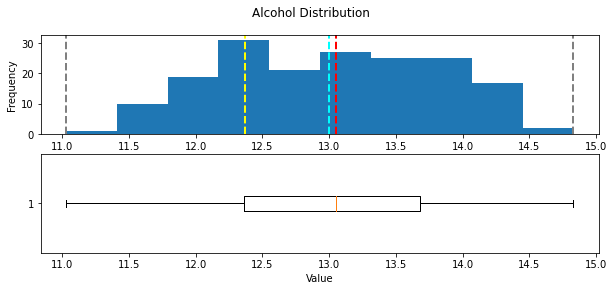

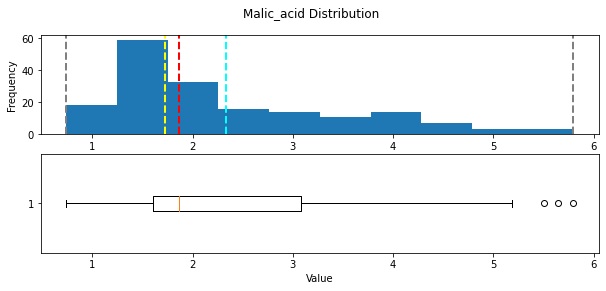

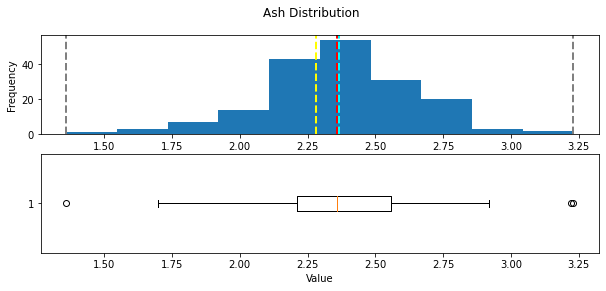

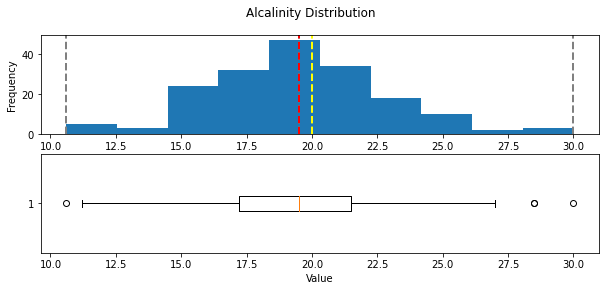

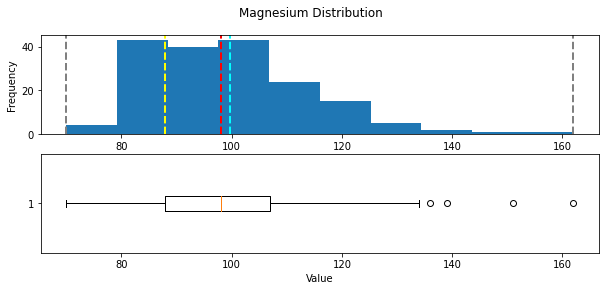

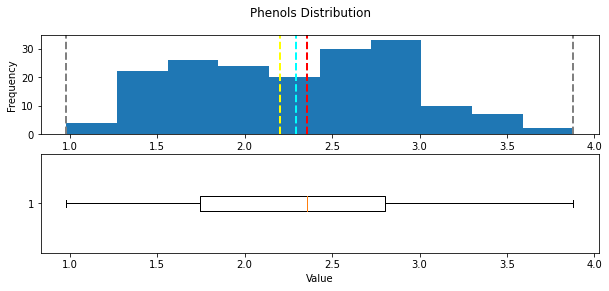

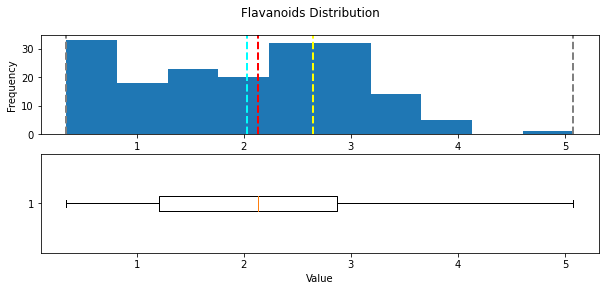

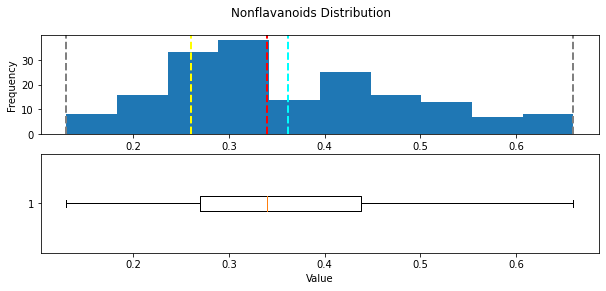

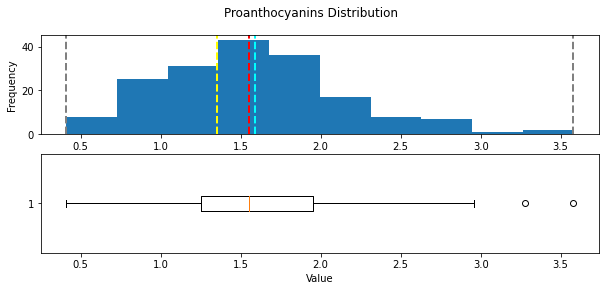

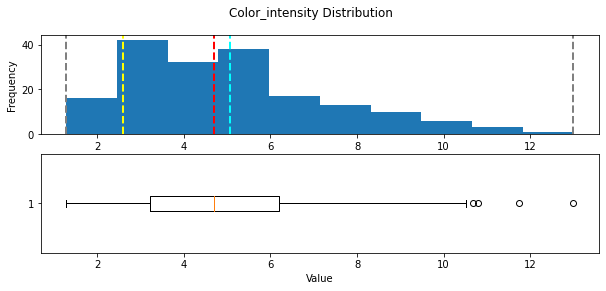

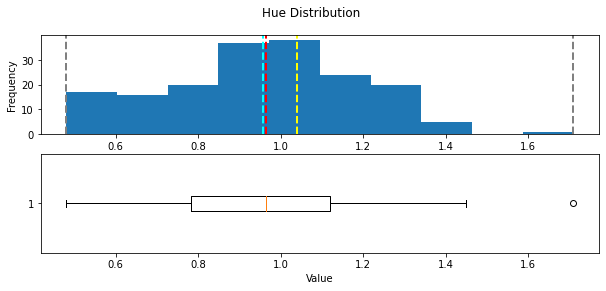

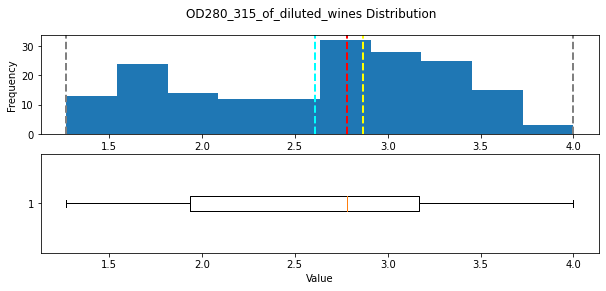

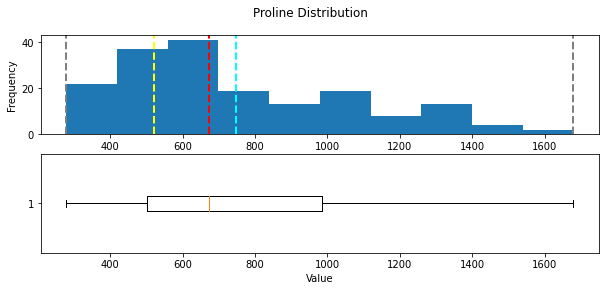

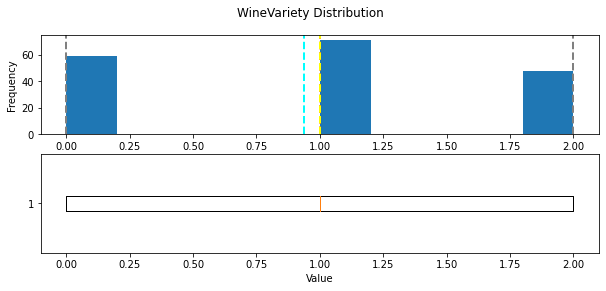

In [10]:
# Columns Distribution
for col in data.columns:
    utils.show_distribution(data[col], variable_name = col)

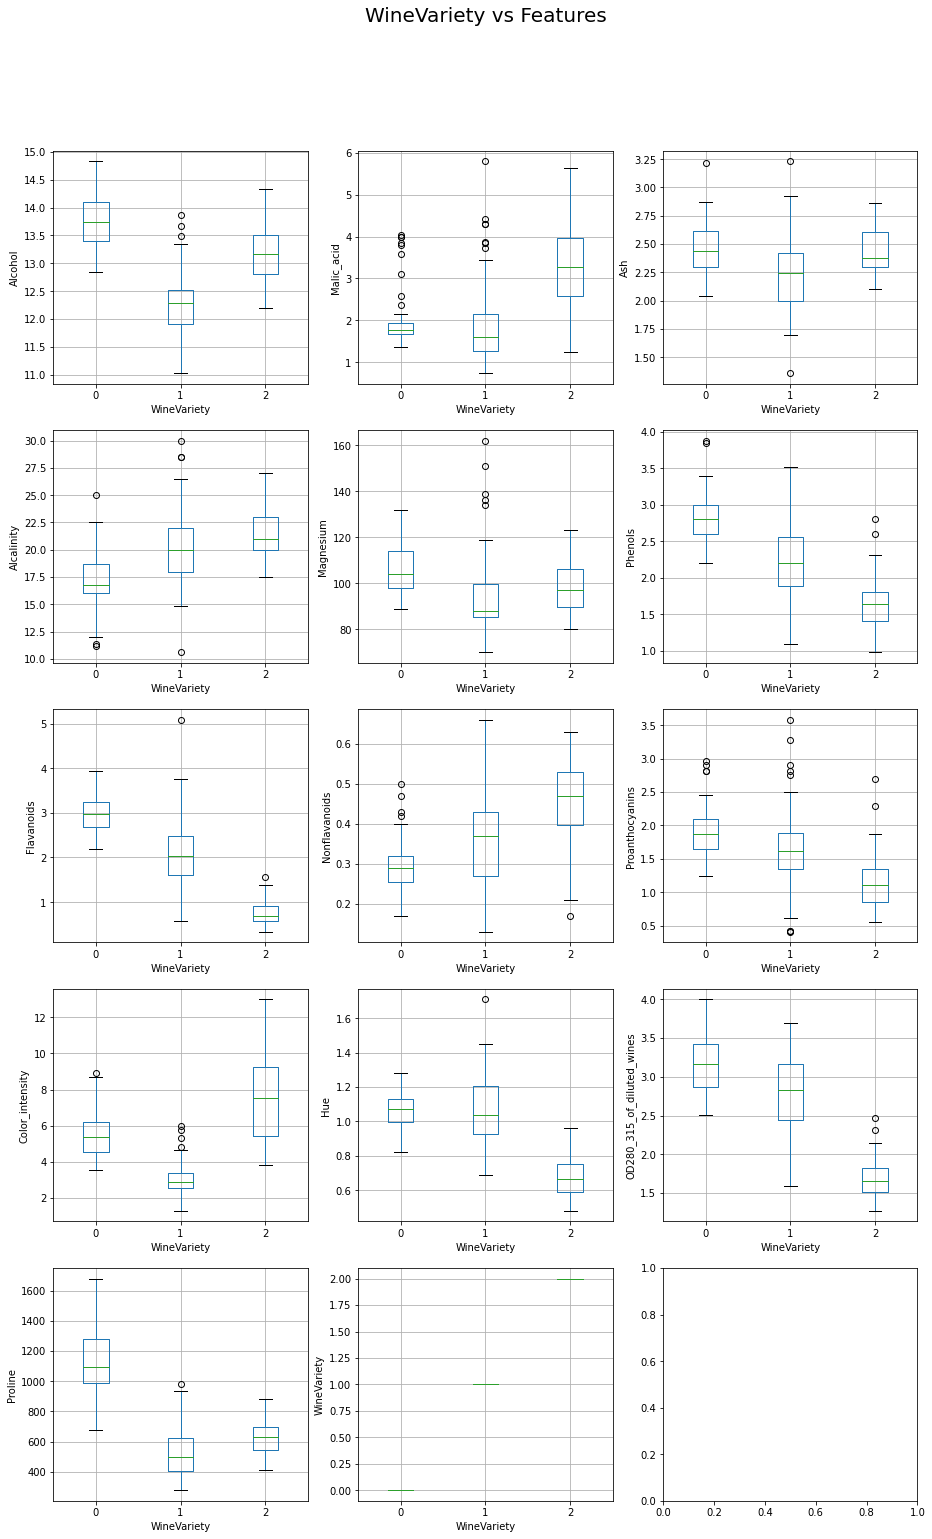

In [23]:
# BoxPlots -> Columns vs Wine Class
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 25))
axes = axes.flat
for i, col in enumerate(data.columns):
    data.boxplot(column = col, by = "WineVariety", ax = axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_title("")
fig.suptitle("WineVariety vs Features", size = 20);

**Identify Features Class:**

All the features are numeric. -> 13 Features and 1 Target.

**Missing Values:**

We do not have missing values.

**Outliers:**

There are few outliers in "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Proanthocyanins", "Color_intensity","Hue". But we won't drop it.

**Target vs Features:**

There are a clear difference in feature falue for each target then all features could be useful for classification.

In [27]:
# Target and Feature Variables
feature_variables = [col for col in data.columns if col != "WineVariety"]
X = data[feature_variables]
y = data["WineVariety"]

In [30]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

We do not need standardScaler beacuse random forest doesn't need scaler.

In [45]:
# Fit Random Forest
forest = RandomForestClassifier(n_estimators = 1000)
forest.fit(X_train.values, y_train)
predictions = forest.predict(X_test.values)

In [46]:
# The overall recall is greater than 95%
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00         8

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [47]:
import joblib
import numpy as np

# Save the model as .pkl
filename = './diabetes_model.pkl'
joblib.dump(forest, filename)

# Load the model from .pkl
forest_load = joblib.load(filename)

# New observations
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Predictions
forest_load.predict(x_new)

array([0, 1], dtype=int64)